In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# importing the datset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anime-recommender/dataset/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
# Dropping the unnecessary columns
df.drop(['anime_id','type','episodes','members','rating'],axis=1,inplace=True)
print(df.shape)
df.head()

(12294, 2)


,name,genre
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"Sci-Fi, Thriller"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


name      0
genre    62
dtype: int64


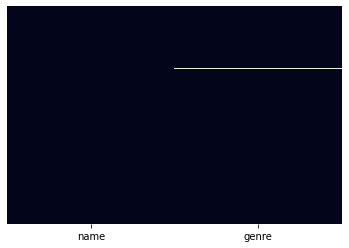

In [4]:
# missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=0)
print(df.isnull().sum())
plt.show()

In [5]:
# dropping null values
df.dropna(inplace=True)
print(df.shape)
df.head()

(12232, 2)


,name,genre
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"Sci-Fi, Thriller"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


In [6]:
# splitting columns
name = df['name']
genre = df['genre']

In [7]:
# removing commas
def remove_comma(text):
    return ' '.join(text.split(', '))
genre = genre.apply(remove_comma)

In [8]:
# Bag of Words
vectorizer = CountVectorizer()
vectorized_genre = vectorizer.fit_transform(genre)

In [9]:
# get anime input
anime_name = 'Fullmetal Alchemist: Brotherhood'
anime_no = name[name == 'Fullmetal Alchemist: Brotherhood'].index[0]
anime_profile = vectorized_genre.toarray()[anime_no]
print(vectorizer.inverse_transform(anime_profile.reshape(1,-1))[0])

# similarity 
similarity = []
for anime in vectorized_genre.toarray():
    similarity.append((anime == anime_profile).mean())


similarity_list = pd.DataFrame({
        'anime':list(name),
        'similarity':similarity                       
})

['action' 'adventure' 'drama' 'fantasy' 'magic' 'military' 'shounen']


In [10]:
similarity_list.sort_values(by='similarity',ascending=False).head(20)

,anime,similarity
1,Fullmetal Alchemist: Brotherhood,1.000000
200,Fullmetal Alchemist,0.978723
1558,Fullmetal Alchemist: The Sacred Star of Milos,0.978723
402,Fullmetal Alchemist: Brotherhood Specials,0.978723
461,Magi: Sinbad no Bouken,0.957447
290,Magi: Sinbad no Bouken (TV),0.957447
6864,Jikuu Tenshou Nazca,0.957447
101,Magi: The Kingdom of Magic,0.957447
3831,Log Horizon Recap,0.957447
4976,Densetsu no Yuusha no Densetsu: Iris Report,0.957447
